# Yellow Pages Webscrapping 

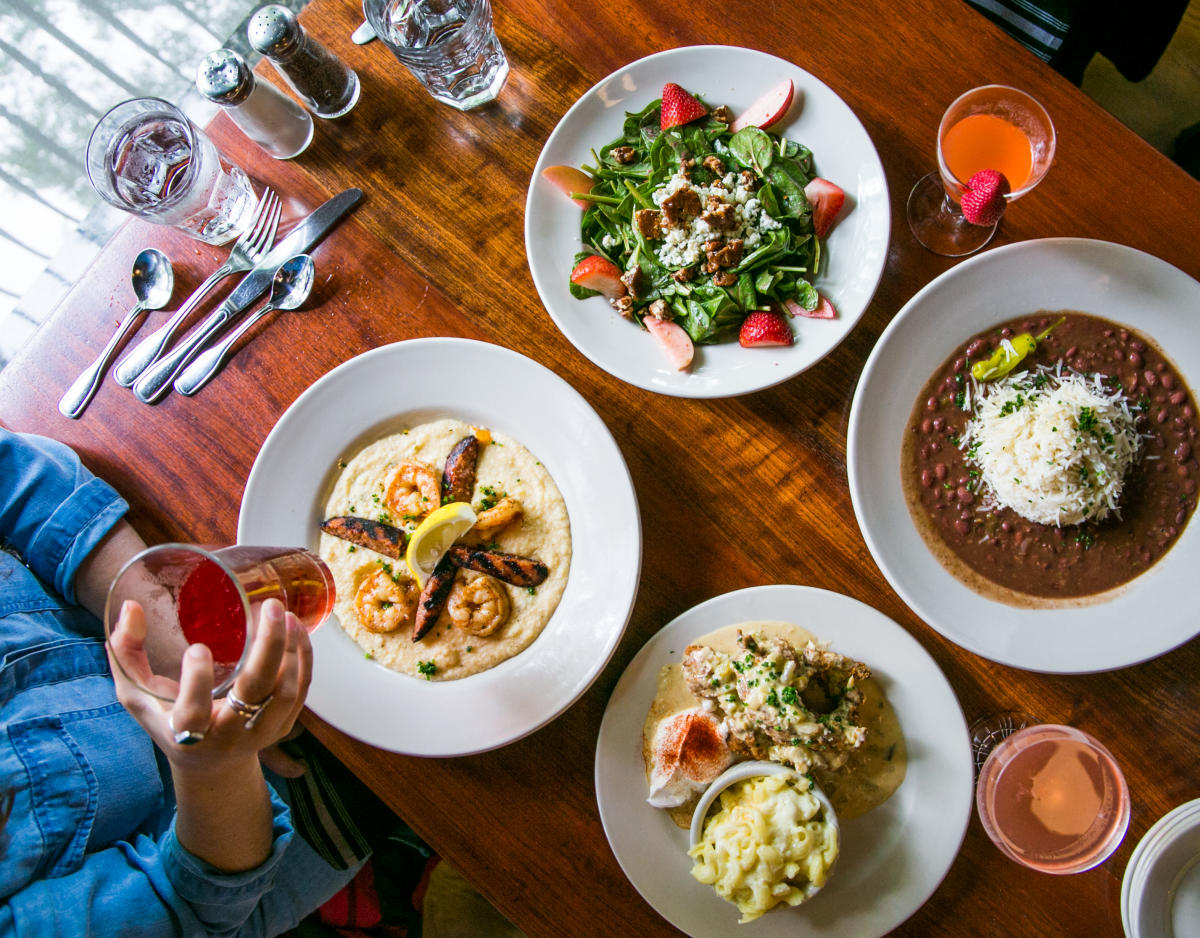

## Import packages

In [170]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup as bs
import ast
# regular expressions in python
import re

import numpy as np

In [171]:
URL = "https://www.yellowpages.com/los-angeles-ca/restaurants"
response = requests.get(URL)
soup = bs(response.text, "html.parser")

yp_ratings = soup.find_all(class_='rating hasExtraRating')
business_names = soup.find_all('a', class_='business-name')
trip_advisor_foursquare_ratings = soup.find_all(class_='ratings')
price_ranges = soup.find_all(class_='price-range')
phone_numbers = soup.find_all(class_='phones phone primary')
business_ids = soup.find_all(class_='result')
city_and_state = soup.find_all(class_='locality')

list_of_businesses = soup.find_all(class_ = 'search-results organic')

## Get the business names

In [172]:
biz_dummy = []
pattern1 = "<span>(.*?)<\/span>"
pattern2 = '>(.*?)<\/a>'

for ele in business_names:
    ele = str(ele)
    name = re.findall(pattern1, ele) 
    if len(name) >= 1:
        biz_dummy.append(name[0].replace(' &amp', ''))

## Get yellow pages rating


In [175]:
yp_ratings = soup.find_all('div', class_='ratings')

In [177]:
yp_list = []
yp_pattern1 = "result-rating(.*?)\""

for yp in yp_ratings:
    yp = str(yp)
    yp_rating = re.findall(yp_pattern1, yp)
    yp_list.append(''.join(yp_rating))

    
yp_list[:5]

[' four half', ' four half', ' four', ' five', ' four']

## Get foursquare and tripadvisor ratings

In [179]:
trip_advisor_foursquare_ratings = soup.find_all(class_='ratings')

[<div class="ratings" data-foursquare="7.9" data-israteable="true" data-tripadvisor='{"rating":"4.5","count":"133"}'><a class="rating hasExtraRating" data-analytics='{"click_id":22,"listing_features":"ratings"}' href="/los-angeles-ca/mip/palermo-ristorante-italiano-540709640?lid=1001234798248#yp-rating"><div class="result-rating four half"></div><span class="count">(40)</span></a></div>,
 <div class="ratings" data-foursquare="7.72" data-israteable="true" data-tripadvisor='{"rating":"4.5","count":"106"}'><a class="rating hasExtraRating" data-analytics='{"click_id":22,"listing_features":"ratings"}' href="/los-angeles-ca/mip/casa-bianca-pizza-pie-13519?lid=1000448029884#yp-rating"><div class="result-rating four half"></div><span class="count">(31)</span></a></div>,
 <div class="ratings" data-foursquare="8.43" data-israteable="true"><a class="rating" data-analytics='{"click_id":22,"listing_features":"ratings"}' href="/los-angeles-ca/mip/dulan-soul-food-kitchen-531675984?lid=1001563228013#y

In [180]:
foursquare_pattern = 'foursquare=\"(.*?)"'
foursquare_rating_list = []

for element in trip_advisor_foursquare_ratings:
    element = str(element)
    four_square_rating = re.findall(foursquare_pattern, element)
    foursquare_rating_list.append(''.join(four_square_rating))
    
foursquare_rating_list[:5]

['7.9', '7.72', '8.43', '8.43', '6.75']

In [181]:
updated_foursquare_ratings = []

for num in foursquare_rating_list:
    if num != '':
        num = float(num)
    elif num == '':
        num = np.NaN
    updated_foursquare_ratings.append(num)

updated_foursquare_ratings[:5]

[7.9, 7.72, 8.43, 8.43, 6.75]

### Get the Trip Advisor ratings

In [183]:
tripadvisor_pattern ="tripadvisor='{\"rating\":\"(.*?)\","

tripadvisor_rating_list = []

for element in trip_advisor_foursquare_ratings:
    element = str(element)
    trip_advisor_rating = re.findall(tripadvisor_pattern, element)
    tripadvisor_rating_list.append(''.join(trip_advisor_rating))

In [184]:
updated_tripdvisor_ratings = []

for num in tripadvisor_rating_list:
    if num != '':
        num = float(num)
    elif num == '':
        num = np.NaN
    updated_tripdvisor_ratings.append(num)

len(updated_tripdvisor_ratings)

30

## Get the phone numbers

In [186]:
phone_number_pattern = 'primary">(.*?)<\/div>'

phone_number_list = []

for number in phone_numbers:
    number = str(number)
    biz_number = re.findall(phone_number_pattern, number)
    phone_number_list.append(''.join(biz_number))
    
phone_number_list[:5]

['(323) 663-1178',
 '(323) 256-9617',
 '(323) 418-8527',
 '(323) 653-7970',
 '(310) 645-0456']

## Get business id's

In [188]:
business_ids_pattern = 'listing_id":"(.*?)",'

business_id_list = []

for business_id in business_ids:
    business_id = str(business_id)
    biz_id = re.findall(business_ids_pattern, business_id)
    business_id_list.append(''.join(biz_id ))
    
business_id_list[:5]

['10012347982481001234798248',
 '1000448029884',
 '1001563228013',
 '4381539',
 '23711112371111']

In [189]:
updated_biz_ids = []

for num in business_id_list:
    num = int(num)
    updated_biz_ids.append(num)

updated_biz_ids[:5]

[10012347982481001234798248,
 1000448029884,
 1001563228013,
 4381539,
 23711112371111]

## Get Price ranges

In [191]:
price_range_pattern = 'range">(.*?)<\/div>'

price_range_list = []

for price in price_ranges:
    price = str(price)
    price_num = re.findall(price_range_pattern, price)
    price_range_list.append(''.join(price_num))
    
price_range_list[:5]

['$', '$$', '$$', '$$', '$$']

## Get City and State and Address


In [ ]:
city_list = []
state_list = []
zip_codes_list = []

city_and_state = [x.text for x in soup.find_all('div', class_='locality')]

for element in city_and_state:
    split_element = element.split(',')
    city = split_element[0]
    city_list.append(city)
    state = split_element[1][:3]
    state_list.append(state)
    zip_code = split_element[1][4:]
    zip_codes_list.append(zip_code)


In [245]:
find_address = soup.find_all(class_='info-section info-secondary')
street_address_extract1 = [x.find('div', 'street-address') for x in find_address]

address_list = []
address_pattern = '"street-address">(.*?)<\/div>'

for x in street_address_extract1:
    x = str(x)
    address = re.findall(address_pattern, x)
    address_list.append(''.join(address))

len(address_list)
    

30

## Get Trip Advisor Rating Counts

In [ ]:
ratingsDiv = soup.findAll('div', class_='ratings')
extraRatings = {}
tripAdvisorRating = {}
tripAdvisorReviewCount = {}
fourSquare = {}

for i,r in enumerate(ratingsDiv):
    tripAdvAttributeValueDict = ast.literal_eval(str(r.get('data-tripadvisor')))
    if type(tripAdvAttributeValueDict) == dict:
        tripAdvisorRating[i] = tripAdvAttributeValueDict['rating']
        tripAdvisorReviewCount[i] = tripAdvAttributeValueDict['count']
    else:
        tripAdvisorRating[i] = None
        tripAdvisorReviewCount[i] = None

    fourSquare[i] = r.get('data-foursquare')
    r = str(r)
    if 'hasExtraRating' in r:
        internalRatingValues = re.findall("(?<=result-rating)(\s*\w*\s*\w*)\"", r)
        extraRatings[i] = internalRatingValues[0][1:]
    else:
        extraRatings[i] = None

internalRatingCounts = [x.text.replace('(', '').replace(')', '') for x in soup.find_all('span', class_='count')]


In [ ]:
trip_advisor_review_count = []

for key,value in tripAdvisorReviewCount.items():
    trip_advisor_review_count.append(value)


## Get Years in Business

In [ ]:
years_in_biz = [x.text for x in soup.find_all('div', class_='years-in-business')]

44
68
28
12
32
11
15
11
48
27
31
23
37
37
22
16
19
39
11
29
35
22
26
26
29
17


In [ ]:
biz_year_list = []

biz_years = [x.text for x in soup.find_all('div', class_='badges')]

biz_years
for year in biz_years:
    if len(year) > 1: 
        year = year[:2]
        biz_year_list.append(year)
    elif len(year) < 1:
        year = 'NaN'
        biz_year_list.append(year)


30

## Get Menu and Website

In [213]:
links = [x for x in soup.find_all('div', class_='result')]

website_list = []

for x in links:
    if 'website' in str(x):
        site_name = x.find('a', 'track-visit-website').get("href")
        website_list.append(site_name)
    else:
        website_list.append('NaN')

30

In [221]:
links = [x for x in soup.find_all('div', class_='result')]

menu_list = []

for x in links:
    if '"listing_features":"menu-link' in str(x):
        menu_name = 'yellowpages.com' + x.find('a', 'menu').get("href")
        menu_list.append(menu_name)
    else:
        menu_list.append('NaN')

len(menu_list)

30

## Check length of each list

In [218]:
print(len(biz_dummy))
print(len(yp_list))
print(len(updated_foursquare_ratings))
print(len(updated_tripdvisor_ratings))
print(len(trip_advisor_review_count))
print(len(business_id_list))
print(len(price_range_list))
print(len(phone_number_list))
print(len(city_list))
print(len(zip_codes_list))
print(len(state_list))
print(len(biz_year_list))
print(len(menu_list))
print(len(website_list))

30
30
30
30
30
30
30
30
30
30
30
30
30
30


## Place all lists into disctionary

In [270]:

business_dictionary = {
            'business_id':phone_number_list,
            'business_name':biz_dummy,
            'phone_number':phone_number_list,
            'years in_business': biz_year_list,
            'yellow_page_rating': yp_list,
            'foursquare_rating':updated_foursquare_ratings,
            'trip_advisor_rating':updated_tripdvisor_ratings,
            'trip_advisor_rating_count': trip_advisor_review_count, 
            'price_range':price_range_list,
            'city': city_list,
            'state': state_list,
            'zip_code': zip_codes_list,
            'address': address_list,
            'menu': menu_list,
            'website': website_list
            
              }

## Convert dictionary to pandas dataframe

In [272]:
business_df = pd.DataFrame.from_dict(business_dictionary)
business_df.head()

,business_id,business_name,phone_number,years in_business,yellow_page_rating,foursquare_rating,trip_advisor_rating,trip_advisor_rating_count,price_range,city,state,zip_code,address,menu,website
0,(323) 663-1178,Palermo Ristorante Italiano,(323) 663-1178,44,four half,7.90,4.5,133,$,Los Angeles,CA,90027,1858 N Vermont Ave,yellowpages.com/los-angeles-ca/mip/palermo-ris...,http://palermorestaurant.net
1,(323) 256-9617,Casa Bianca Pizza Pie,(323) 256-9617,68,four half,7.72,4.5,106,$$,Los Angeles,CA,90041,,yellowpages.com/los-angeles-ca/mip/casa-bianca...,http://www.casabiancapizza.com
2,(323) 418-8527,Dulan Soul Food Kitchen,(323) 418-8527,28,four,8.43,NaN,None,$$,Los Angeles,CA,90047,,NaN,http://www.dulans-sfk.com
3,(323) 653-7970,Mauro's Restaurant,(323) 653-7970,12,five,8.43,4.5,44,$$,Los Angeles,CA,90046,8112 Melrose Ave,yellowpages.com/los-angeles-ca/mip/mauros-rest...,http://www.mauroscafe.com
4,(310) 645-0456,Dinah's Family Restaurant,(310) 645-0456,32,four,6.75,4.0,283,$$,Los Angeles,CA,90045,6521 S Sepulveda Blvd,yellowpages.com/los-angeles-ca/mip/dinahs-fami...,NaN


## Cleaning the data

In [273]:
business_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   business_id                30 non-null     object 
 1   business_name              30 non-null     object 
 2   phone_number               30 non-null     object 
 3   years in_business          30 non-null     object 
 4   yellow_page_rating         30 non-null     object 
 5   foursquare_rating          24 non-null     float64
 6   trip_advisor_rating        25 non-null     float64
 7   trip_advisor_rating_count  25 non-null     object 
 8   price_range                30 non-null     object 
 9   city                       30 non-null     object 
 10  state                      30 non-null     object 
 11  zip_code                   30 non-null     object 
 12  address                    30 non-null     object 
 13  menu                       30 non-null     object 
 

## Clean up Business Id

In [288]:
business_df['business_id'] = business_df['business_id'].str.replace('(','').str.replace(')','').str.replace('-','').str.replace(' ','')
business_df.head()

C:\Users\kedei\AppData\Local\Temp\ipykernel_32592\3811162687.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  business_df['business_id'] = business_df['business_id'].str.replace('(','').str.replace(')','').str.replace('-','').str.replace(' ','')


,business_id,business_name,phone_number,years in_business,yellow_page_rating,foursquare_rating,trip_advisor_rating,trip_advisor_rating_count,price_range,city,state,zip_code,address,menu,website
0,3236631178,Palermo Ristorante Italiano,(323) 663-1178,44,four half,7.90,4.5,133,$,Los Angeles,CA,90027,1858 N Vermont Ave,yellowpages.com/los-angeles-ca/mip/palermo-ris...,http://palermorestaurant.net
1,3232569617,Casa Bianca Pizza Pie,(323) 256-9617,68,four half,7.72,4.5,106,$$,Los Angeles,CA,90041,,yellowpages.com/los-angeles-ca/mip/casa-bianca...,http://www.casabiancapizza.com
2,3234188527,Dulan Soul Food Kitchen,(323) 418-8527,28,four,8.43,NaN,None,$$,Los Angeles,CA,90047,,NaN,http://www.dulans-sfk.com
3,3236537970,Mauro's Restaurant,(323) 653-7970,12,five,8.43,4.5,44,$$,Los Angeles,CA,90046,8112 Melrose Ave,yellowpages.com/los-angeles-ca/mip/mauros-rest...,http://www.mauroscafe.com
4,3106450456,Dinah's Family Restaurant,(310) 645-0456,32,four,6.75,4.0,283,$$,Los Angeles,CA,90045,6521 S Sepulveda Blvd,yellowpages.com/los-angeles-ca/mip/dinahs-fami...,NaN


## Check for empty values

In [293]:
def check_empty_values(col):
    return business_df[business_df[col] == '']


In [290]:
business_df.price_range.value_counts()

$$     22
$$$     5
$       3
Name: price_range, dtype: int64

In [264]:
business_df[business_df['address'] == '']

,primary_key,business_name,years in_business,yellow_page_rating,foursquare_rating,trip_advisor_rating,trip_advisor_rating_count,business_id,price_range,city,state,zip_code,address,menu,website
1,(323) 256-9617,Casa Bianca Pizza Pie,68,four half,7.72,4.5,106,1000448029884,$$,Los Angeles,CA,90041,,yellowpages.com/los-angeles-ca/mip/casa-bianca...,http://www.casabiancapizza.com
2,(323) 418-8527,Dulan Soul Food Kitchen,28,four,8.43,NaN,None,1001563228013,$$,Los Angeles,CA,90047,,NaN,http://www.dulans-sfk.com
